# Model Construction

In [2]:
#first get the data
import pandas as pd
import numpy as np

data = pd.read_csv('prepared-prices.csv')

In [3]:
data

,Date,Open,High,Low,Close,Adj Close,Volume,var1(t-5),var1(t-4),var1(t-3),var1(t-2),var1(t-1),previous-close,movement
0,2015-12-31,107.01,107.03,104.82,105.26,98.66,40912300,NaN,NaN,NaN,NaN,NaN,NaN,down
1,2016-01-04,102.61,105.37,102.00,105.35,98.74,67649400,NaN,NaN,NaN,NaN,105.26,105.26,up
2,2016-01-05,105.75,105.85,102.41,102.71,96.27,55791000,NaN,NaN,NaN,105.26,105.35,105.35,down
3,2016-01-06,100.56,102.37,99.87,100.70,94.38,68457400,NaN,NaN,105.26,105.35,102.71,102.71,down
4,2016-01-07,98.68,100.13,96.43,96.45,90.40,81094400,NaN,105.26,105.35,102.71,100.70,100.70,down
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
937,2019-09-23,218.95,219.84,217.65,218.72,218.72,19165500,219.90,220.70,222.77,220.96,217.73,217.73,up
938,2019-09-24,221.03,222.49,217.19,217.68,217.68,31190800,220.70,222.77,220.96,217.73,218.72,218.72,down
939,2019-09-25,218.55,221.50,217.14,221.03,221.03,21903400,222.77,220.96,217.73,218.72,217.68,217.68,up
940,2019-09-26,220.00,220.94,218.83,219.89,219.89,18833500,220.96,217.73,218.72,217.68,221.03,221.03,down


In [4]:
#get the required models 

In [5]:
from pandas import read_csv
from matplotlib import pyplot
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [6]:
data.reset_index()

,index,Date,Open,High,Low,Close,Adj Close,Volume,var1(t-5),var1(t-4),var1(t-3),var1(t-2),var1(t-1),previous-close,movement
0,0,2015-12-31,107.01,107.03,104.82,105.26,98.66,40912300,NaN,NaN,NaN,NaN,NaN,NaN,down
1,1,2016-01-04,102.61,105.37,102.00,105.35,98.74,67649400,NaN,NaN,NaN,NaN,105.26,105.26,up
2,2,2016-01-05,105.75,105.85,102.41,102.71,96.27,55791000,NaN,NaN,NaN,105.26,105.35,105.35,down
3,3,2016-01-06,100.56,102.37,99.87,100.70,94.38,68457400,NaN,NaN,105.26,105.35,102.71,102.71,down
4,4,2016-01-07,98.68,100.13,96.43,96.45,90.40,81094400,NaN,105.26,105.35,102.71,100.70,100.70,down
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
937,937,2019-09-23,218.95,219.84,217.65,218.72,218.72,19165500,219.90,220.70,222.77,220.96,217.73,217.73,up
938,938,2019-09-24,221.03,222.49,217.19,217.68,217.68,31190800,220.70,222.77,220.96,217.73,218.72,218.72,down
939,939,2019-09-25,218.55,221.50,217.14,221.03,221.03,21903400,222.77,220.96,217.73,218.72,217.68,217.68,up
940,940,2019-09-26,220.00,220.94,218.83,219.89,219.89,18833500,220.96,217.73,218.72,217.68,221.03,221.03,down


In [7]:
data.values

array([['2015-12-31', 107.01, 107.03, ..., nan, nan, 'down'],
       ['2016-01-04', 102.61, 105.37, ..., 105.26, 105.26, 'up'],
       ['2016-01-05', 105.75, 105.85, ..., 105.35, 105.35, 'down'],
       ...,
       ['2019-09-25', 218.55, 221.5, ..., 217.68, 217.68, 'up'],
       ['2019-09-26', 220.0, 220.94, ..., 221.03, 221.03, 'down'],
       ['2019-09-27', 220.54, 220.96, ..., 219.89, 219.89, 'down']],
      dtype=object)

In [8]:
#onehot encoding for the movement column 
dummies = pd.get_dummies(data['movement'])

In [9]:
data = pd.concat([data, dummies], axis=1)

In [10]:
data = data.fillna(0)

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 942 entries, 0 to 941
Data columns (total 16 columns):
Date              942 non-null object
Open              942 non-null float64
High              942 non-null float64
Low               942 non-null float64
Close             942 non-null float64
Adj Close         942 non-null float64
Volume            942 non-null int64
var1(t-5)         942 non-null float64
var1(t-4)         942 non-null float64
var1(t-3)         942 non-null float64
var1(t-2)         942 non-null float64
var1(t-1)         942 non-null float64
previous-close    942 non-null float64
movement          942 non-null object
down              942 non-null uint8
up                942 non-null uint8
dtypes: float64(11), int64(1), object(2), uint8(2)
memory usage: 105.0+ KB


In [12]:
X = data.drop(columns=['Date','Close','movement'])
y = data['movement']

In [13]:
len(X) * 0.75

706.5

In [14]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 942 entries, 0 to 941
Data columns (total 13 columns):
Open              942 non-null float64
High              942 non-null float64
Low               942 non-null float64
Adj Close         942 non-null float64
Volume            942 non-null int64
var1(t-5)         942 non-null float64
var1(t-4)         942 non-null float64
var1(t-3)         942 non-null float64
var1(t-2)         942 non-null float64
var1(t-1)         942 non-null float64
previous-close    942 non-null float64
down              942 non-null uint8
up                942 non-null uint8
dtypes: float64(10), int64(1), uint8(2)
memory usage: 82.9 KB


In [15]:
# split into inputs and outputs --- NOT USING NORMAL SPLITING SINCE THIS IS TIME SERIES
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42) 

X_train = X.iloc[:706, :]
X_test = X.iloc[706:, :]

y_train = y.iloc[:706]
y_test = y.iloc[706:]

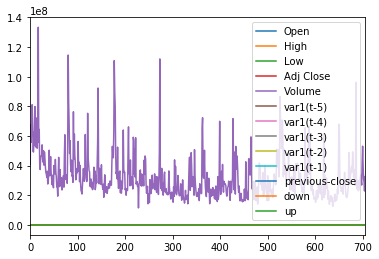

In [16]:
X_train.plot()

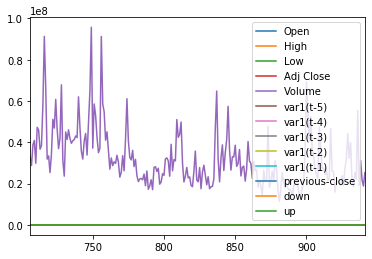

In [17]:
X_test.plot()

LR 100.000%
KNN 100.000%
KNN-7 100.000%
CART 100.000%
SVM 100.000%
RF 100.000%
GBM 100.000%


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


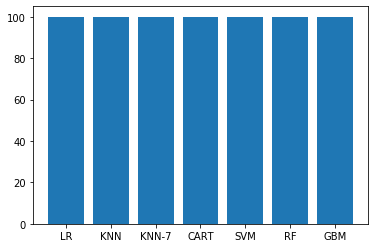

In [18]:
# create a list of models to evaluate
models, names = list(), list()
# logistic
models.append(LogisticRegression())
names.append('LR')
# knn
models.append(KNeighborsClassifier())
names.append('KNN')
# knn
models.append(KNeighborsClassifier(n_neighbors=7))
names.append('KNN-7')
# cart
models.append(DecisionTreeClassifier())
names.append('CART')
# svm
models.append(SVC())
names.append('SVM')
# random forest
models.append(RandomForestClassifier())
names.append('RF')
# gbm
models.append(GradientBoostingClassifier())
names.append('GBM')
# evaluate models
all_scores = list()
for i in range(len(models)):
	# create a pipeline for the model
	scaler = StandardScaler()
	model = Pipeline(steps=[('s',scaler), ('m',models[i])])
	# fit
	# model = models[i]
	model.fit(X_train, y_train)
	# predict
	yhat = model.predict(X_test)
	# evaluate
	score = accuracy_score(y_test, yhat) * 100
	all_scores.append(score)
	# summarize
	print('%s %.3f%%' % (names[i], score))
# plot
pyplot.bar(names, all_scores)
pyplot.show()

In [102]:
!pip install keras

    100% |████████████████████████████████| 378kB 75kB/s ta 0:00:01
    100% |████████████████████████████████| 51kB 161kB/s ta 0:00:01
    100% |████████████████████████████████| 51kB 486kB/s ta 0:00:011


In [110]:
!pip install --upgrade setuptools

    100% |████████████████████████████████| 583kB 644kB/s ta 0:00:01
  Found existing installation: setuptools 40.6.3
    Uninstalling setuptools-40.6.3:
      Successfully uninstalled setuptools-40.6.3


In [115]:
conda update --all

Solving environment: done

## Package Plan ##

  environment location: /anaconda3


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    wrapt-1.11.2               |   py37h1de35cc_0          44 KB
    astropy-3.2.1              |   py37h1de35cc_0         6.9 MB
    ipywidgets-7.5.1           |             py_0         107 KB
    libxslt-1.1.33             |       h33a18ac_0         500 KB
    soupsieve-1.9.3            |           py37_0          60 KB
    astroid-2.2.5              |           py37_0         281 KB
    bleach-3.1.0               |           py37_0         221 KB
    mkl-2019.4                 |              233       155.2 MB
    packaging-19.2             |             py_0          30 KB
    spyder-kernels-0.5.2       |           py37_0          69 KB
    scipy-1.3.1                |   py37h1410ff5_0        16.0 MB
    pytz-2019.2                |             py_0        

wrapt-1.11.2         | 44 KB     | ##################################### | 100% 
astropy-3.2.1        | 6.9 MB    | ##################################### | 100% 
ipywidgets-7.5.1     | 107 KB    | ##################################### | 100% 
libxslt-1.1.33       | 500 KB    | ##################################### | 100% 
soupsieve-1.9.3      | 60 KB     | ##################################### | 100% 
astroid-2.2.5        | 281 KB    | ##################################### | 100% 
bleach-3.1.0         | 221 KB    | ##################################### | 100% 
mkl-2019.4           | 155.2 MB  | ##################################### | 100% 
packaging-19.2       | 30 KB     | ##################################### | 100% 
spyder-kernels-0.5.2 | 69 KB     | ##################################### | 100% 
scipy-1.3.1          | 16.0 MB   | ##################################### | 100% 
pytz-2019.2          | 245 KB    | ##################################### | 100% 
sqlite-3.29.0        | 2.4 M

In [116]:
pip install --upgrade tensorflow==2.0.0-beta1

  Using cached https://files.pythonhosted.org/packages/d3/c4/1f93387c61e75b3977a7ad533762f40d9b4741992bfa2ec8f13ecda0456f/tensorflow-2.0.0b1-cp37-cp37m-macosx_10_11_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/d0/33/376510eb8d6246f3c30545f416b2263eee461e40940c2a4413c711bdf62d/google_pasta-0.1.7-py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/32/dd/99c47dd007dcf10d63fd895611b063732646f23059c618a373e85019eb0e/tf_estimator_nightly-1.14.0.dev2019060501-py2.py3-none-any.whl
Note: you may need to restart the kernel to use updated packages.


In [20]:
#now lets try with deep learning using keras 
import keras
from keras.utils import to_categorical
from keras.layers import Input, Dense, Flatten
from keras.models import Model
from keras.models import Sequential
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from keras.losses import categorical_crossentropy
from keras.optimizers import SGD
from sklearn.preprocessing import LabelEncoder
from keras.wrappers.scikit_learn import KerasClassifier

In [21]:
X = data.drop(columns=['Date','movement', 'up', 'down'])
y = data['movement']
# split into inputs and outputs
X_train = X.iloc[:706, :]
X_test = X.iloc[706:, :]

y_train = y.iloc[:706]
y_test = y.iloc[706:]

In [22]:
encoder = LabelEncoder()
encoder.fit(y_train)
encoder.fit(y_test)
encoded_Y_train = encoder.transform(y_train)
encoded_Y_test = encoder.transform(y_test)

In [23]:
encoded_Y_train

array([0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1,
       1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1,
       0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1,

In [25]:
X_test.shape

(236, 12)

In [26]:
data.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume',
       'var1(t-5)', 'var1(t-4)', 'var1(t-3)', 'var1(t-2)', 'var1(t-1)',
       'previous-close', 'movement', 'down', 'up'],
      dtype='object')

In [27]:
y.head()

0    down
1      up
2    down
3    down
4    down
Name: movement, dtype: object

In [28]:
def create_larger():
    # create model
    model = Sequential()
    model.add(Dense(50, input_dim=12, activation='relu'))
    model.add(Dense(24, activation='relu'))
    model.add(Dense(12, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    # Compile model
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [29]:
estimators = []
estimators.append(('standardize', StandardScaler()))
estimators.append(('mlp', KerasClassifier(build_fn=create_larger, epochs=150, batch_size=5, verbose=0)))

In [30]:
pipeline = Pipeline(estimators)
kfold = StratifiedKFold(n_splits=10, shuffle=True)
results = cross_val_score(pipeline, X_train, encoded_Y_train, cv=kfold)
print("Larger: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Larger: 87.53% (3.74%)


In [31]:
results

array([0.91549295, 0.8309859 , 0.91549295, 0.90140843, 0.80281693,
       0.88732392, 0.91549295, 0.87142855, 0.84285712, 0.86956519])